In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
plt.style.use("ggplot")

In [14]:
df = pd.read_csv("weight_horsepower_mpg.csv")
df

,weight,horsepower,mpg
0,3504.0,130.0,18.0
1,3693.0,165.0,15.0
2,3436.0,150.0,18.0
3,3433.0,150.0,16.0
4,3449.0,140.0,17.0
...,...,...,...
387,2790.0,86.0,27.0
388,2130.0,52.0,44.0
389,2295.0,84.0,32.0
390,2625.0,79.0,28.0


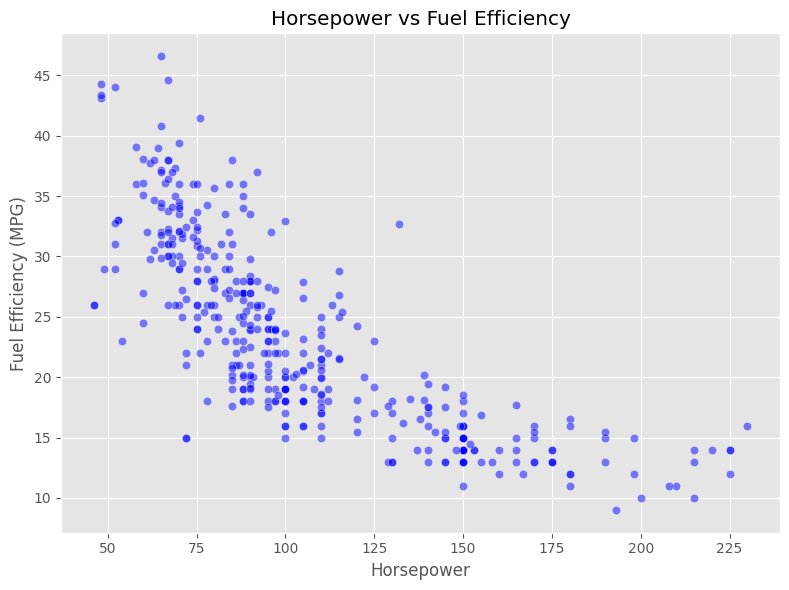

In [53]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x="horsepower",
    y="mpg",
    data=df,
    alpha=0.5,
    color="blue"
)

plt.xlabel("Horsepower")
plt.ylabel("Fuel Efficiency (MPG)")

plt.title("Horsepower vs Fuel Efficiency")

plt.grid(True)

plt.tight_layout()

plt.show()

In [54]:
weight = df["weight"]
weight

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
387    2790.0
388    2130.0
389    2295.0
390    2625.0
391    2720.0
Name: weight, Length: 392, dtype: float64

In [55]:
horsepower = df["horsepower"]
horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
387     86.0
388     52.0
389     84.0
390     79.0
391     82.0
Name: horsepower, Length: 392, dtype: float64

In [56]:
mpg = df["mpg"]
mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [57]:
weight_mean = weight.mean()
weight_mean

2977.5841836734694

In [58]:
weight_std = weight.std()
weight_std

849.4025600429492

In [59]:
weight_norm = (weight - weight_mean) / weight_std
weight_norm

0      0.619748
1      0.842258
2      0.539692
3      0.536160
4      0.554997
         ...   
387   -0.220842
388   -0.997859
389   -0.803605
390   -0.415097
391   -0.303253
Name: weight, Length: 392, dtype: float64

In [60]:
horsepower_mean = horsepower.mean()
horsepower_mean

104.46938775510205

In [61]:
horsepower_std = horsepower.std()
horsepower_std

38.49115993282849

In [62]:
horsepower_norm = (horsepower - horsepower_mean) / horsepower_std
horsepower_norm

0      0.663285
1      1.572585
2      1.182885
3      1.182885
4      0.923085
         ...   
387   -0.479835
388   -1.363154
389   -0.531795
390   -0.661694
391   -0.583754
Name: horsepower, Length: 392, dtype: float64

In [63]:
X1 = weight_norm
X1

0      0.619748
1      0.842258
2      0.539692
3      0.536160
4      0.554997
         ...   
387   -0.220842
388   -0.997859
389   -0.803605
390   -0.415097
391   -0.303253
Name: weight, Length: 392, dtype: float64

In [64]:
X2 = horsepower_norm
X2

0      0.663285
1      1.572585
2      1.182885
3      1.182885
4      0.923085
         ...   
387   -0.479835
388   -1.363154
389   -0.531795
390   -0.661694
391   -0.583754
Name: horsepower, Length: 392, dtype: float64

In [65]:
y = df["mpg"]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [66]:
a1 = 0.0
a2 = 0.0
b = 0.0

In [67]:
m = len(X1)
m

392

In [68]:
epochs = 1000

In [69]:
learning_rate = 0.01

In [70]:
for epoch in range(epochs):
    H = a1 * X1 + a2 * X2 + b
    error = H - y
    cost = (1/m) * np.sum(error ** 2)

    print(f"Epoch {epoch}, Cost: {cost:.4f}, a1: {a1:.4f}, a2: {a2:.4f}, b: {b:.4f}")

    a1_grad = (1/m) * np.sum((H - y) * X1)
    a2_grad = (1/m) * np.sum((H - y) * X2)
    b_grad = (1/m) * np.sum(H - y)

    a1 = a1 - learning_rate * a1_grad
    a2 = a2 - learning_rate * a2_grad
    b = b - learning_rate * b_grad

print(f"\n최적화된 선형회귀식: mpg = {a1:.4f} * weight = {a2:.4f} * horsepower + {b:.4f}")

Epoch 0, Cost: 610.4738, a1: 0.0000, a2: 0.0000, b: 0.0000
Epoch 1, Cost: 597.9751, a1: -0.0648, a2: -0.0606, b: 0.2345
Epoch 2, Cost: 585.7515, a1: -0.1284, a2: -0.1200, b: 0.4666
Epoch 3, Cost: 573.7965, a1: -0.1909, a2: -0.1783, b: 0.6964
Epoch 4, Cost: 562.1040, a1: -0.2522, a2: -0.2355, b: 0.9239
Epoch 5, Cost: 550.6676, a1: -0.3125, a2: -0.2916, b: 1.1491
Epoch 6, Cost: 539.4815, a1: -0.3716, a2: -0.3466, b: 1.3721
Epoch 7, Cost: 528.5399, a1: -0.4297, a2: -0.4005, b: 1.5928
Epoch 8, Cost: 517.8371, a1: -0.4868, a2: -0.4534, b: 1.8113
Epoch 9, Cost: 507.3675, a1: -0.5428, a2: -0.5053, b: 2.0277
Epoch 10, Cost: 497.1258, a1: -0.5978, a2: -0.5562, b: 2.2419
Epoch 11, Cost: 487.1067, a1: -0.6519, a2: -0.6061, b: 2.4539
Epoch 12, Cost: 477.3051, a1: -0.7049, a2: -0.6550, b: 2.6638
Epoch 13, Cost: 467.7160, a1: -0.7570, a2: -0.7030, b: 2.8716
Epoch 14, Cost: 458.3345, a1: -0.8082, a2: -0.7501, b: 3.0774
Epoch 15, Cost: 449.1558, a1: -0.8585, a2: -0.7962, b: 3.2811
Epoch 16, Cost: 440.

In [71]:
weight_input = 100
horsepower_input = 120

In [72]:
weight_input_norm = (weight_input - weight_mean) / weight_std
weight_input_norm

-3.387774324023661

In [73]:
horsepower_input_norm = (horsepower_input - horsepower_mean) / horsepower_std
horsepower_input_norm

0.4034851709327716

In [74]:
predicted_mpg = a1 * weight_input_norm + a2 * horsepower_input_norm + b

print(f"\nweight=100, horsepower=120일 때 예측 연비(MPG): {predicted_mpg:.4f}")


weight=100, horsepower=120일 때 예측 연비(MPG): 37.8628
